[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     Used_Hashtag(s)                                      Tweet_Content  \
0                NaN  A sheer tulle dress that fits with metallic pa...   
1                NaN  A sheer tulle dress that fits with metallic pa...   
2                NaN  A sheer tulle dress that fits with metallic pa...   
3                NaN  A sheer tulle dress that fits with metallic pa...   
4                NaN  A sheer tulle dress that fits with metallic pa...   
...              ...                                                ...   
1307             NaN  The holiday edit https://t.co/u3d9zrVNfE https...   
1308             NaN  The holiday edit https://t.co/u3d9zrVNfE https...   
1309             NaN  The holiday edit https://t.co/u3d9zrVNfE https...   
1310      #zarasrpls  Spring-Summer 2023 sees the SRPLS system under...   
1311      #zarasrpls  Spring-Summer 2023 sees the SRPLS system under...   

      Post_Length  Likes_Count             Tweet_DateTime  Replies_Count  \
0              97      

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


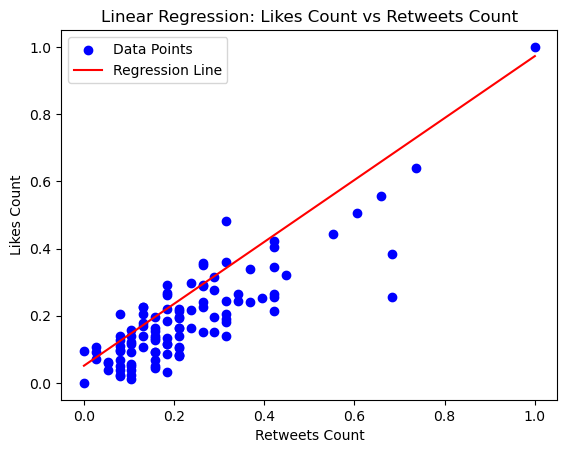

Coefficient: 0.9214389689059741
Intercept: 0.051236616415596015
Equation of the line: Likes_Count = 0.051236616415596015 + 0.9214389689059741 * Retweets_Count
      Tweet_Content  FinalScore
43                8    1.000000
969              92    0.438722
244               9    0.435423
300              11    0.341837
328              13    0.330895
...             ...         ...
735              74    0.032081
749              77    0.031755
732              73    0.029604
715              70    0.023039
1306            107    0.009852

[109 rows x 2 columns]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
file_path = r"C:\Users\hp\Downloads\1. Zara.csv"
df_og = pd.read_csv(file_path)
print(df_og)

df = df_og.iloc[:, 1:7]
df.drop(columns=['Post_Length', 'Tweet_DateTime'], inplace=True)
print(df)
unique_strings = df['Tweet_Content'].unique()
string_to_number = {string: idx for idx, string in enumerate(unique_strings)}

# Replace each string in 'Tweet_Content' with its corresponding number
df['Tweet_Content'] = df['Tweet_Content'].map(string_to_number)

# Now df is your modified DataFrame with 'Tweet_Content' as numbers
print(df.head())
df=df.drop_duplicates()
df['Likes_Count'] = (df['Likes_Count'] - df['Likes_Count'].min()) / (df['Likes_Count'].max() - df['Likes_Count'].min())
df['Replies_Count'] = (df['Replies_Count'] - df['Replies_Count'].min()) / (df['Replies_Count'].max() - df['Replies_Count'].min())
df['Retweets_Count'] = (df['Retweets_Count'] - df['Retweets_Count'].min()) / (df['Retweets_Count'].max() - df['Retweets_Count'].min())

print(df)
#when determining engagement, we have to find a balance between likes and retweets as the primary factor of engagement, and then finally order by replies

x = df[['Likes_Count']]
y = df['Retweets_Count']       # Target (Likes_Count)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.scatter(df['Retweets_Count'], df['Likes_Count'], color='blue', label='Data Points')

# Plotting the regression line
# We need to create a range of Retweets_Count values for plotting the regression line
X_range = np.linspace(df['Retweets_Count'].min(), df['Retweets_Count'].max(), 100)
y_range = model.predict(X_range.reshape(-1, 1))

plt.plot(X_range, y_range, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Retweets Count')
plt.ylabel('Likes Count')
plt.title('Linear Regression: Likes Count vs Retweets Count')
plt.legend()
plt.show()
coefficient = model.coef_[0]
intercept = model.intercept_
print(f"Coefficient: {coefficient}")
print(f"Intercept: {intercept}")

print(f"Equation of the line: Likes_Count = {intercept} + {coefficient} * Retweets_Count")
df = df.assign(CompositeScore=pd.NA)
df['CompositeScore'] = df[['Likes_Count', 'Retweets_Count']].mean(axis=1)
# Compute the composite score as the average of the normalized factors
df['FinalScore'] = df[['CompositeScore', 'Replies_Count']].mean(axis=1)
df_sorted = df.sort_values(by='FinalScore', ascending=False)
df_sorted = df_sorted.drop(['Likes_Count', 'Retweets_Count', 'CompositeScore', 'Replies_Count'], axis=1)

print(df_sorted)